Tutorial on "Anomaly detection". Part Python.

Author: Pavlo Mozharovskyi.

This is a Python Notebook for the tutorial 
on "Anomaly detection" given on Wednesday the 6th of April 2022.

## 0) Import packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn import svm
from sklearn.ensemble import IsolationForest
from depth_routines import depthPrj, depthTuk, depth_tukey

# Cars + Anomalies

The data set contains data about speed and breaking distance of 50 old (normal) and 10 new (anomalies) cars.

## 1) Import dataset, show elemantary statistics, plot the data

In [3]:
dfCars = pd.read_csv('carsanom.csv')
print('Data dimension:', dfCars.shape)
dfCars.head()

Data dimension: (60, 2)


,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


['blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue']


Text(0, 0.5, 'Dist')

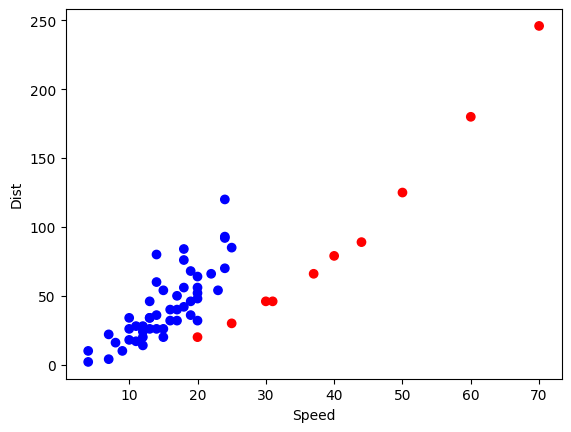

In [7]:
print(np.full(50, "blue"))

X = np.array(dfCars)
plt.scatter(X[:,0], X[:,1], 
            c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')

## 2) Local outlier factor

[[ 0.          0.75757576  1.51515152 ... 73.48484848 74.24242424
  75.        ]
 [ 0.          0.75757576  1.51515152 ... 73.48484848 74.24242424
  75.        ]
 [ 0.          0.75757576  1.51515152 ... 73.48484848 74.24242424
  75.        ]
 ...
 [ 0.          0.75757576  1.51515152 ... 73.48484848 74.24242424
  75.        ]
 [ 0.          0.75757576  1.51515152 ... 73.48484848 74.24242424
  75.        ]
 [ 0.          0.75757576  1.51515152 ... 73.48484848 74.24242424
  75.        ]] [[-5.00000000e+00 -5.00000000e+00 -5.00000000e+00 ... -5.00000000e+00
  -5.00000000e+00 -5.00000000e+00]
 [-2.42424242e+00 -2.42424242e+00 -2.42424242e+00 ... -2.42424242e+00
  -2.42424242e+00 -2.42424242e+00]
 [ 1.51515152e-01  1.51515152e-01  1.51515152e-01 ...  1.51515152e-01
   1.51515152e-01  1.51515152e-01]
 ...
 [ 2.44848485e+02  2.44848485e+02  2.44848485e+02 ...  2.44848485e+02
   2.44848485e+02  2.44848485e+02]
 [ 2.47424242e+02  2.47424242e+02  2.47424242e+02 ...  2.47424242e+02
   2.47424242

Text(0, 0.5, 'LOF score')

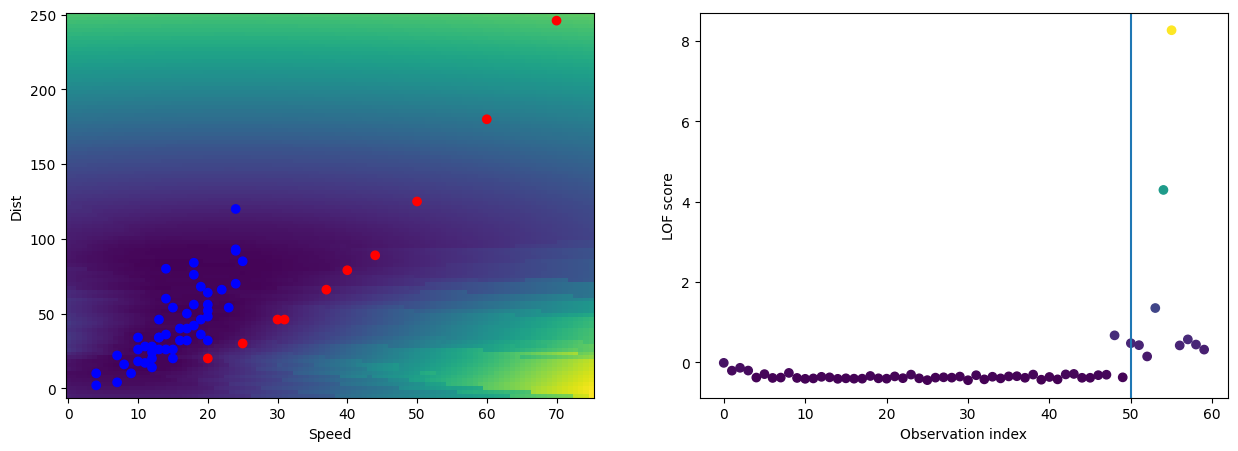

In [9]:
outliers_fraction = 0.05
# Create and fit the instance of the class
alg_lof = LocalOutlierFactor(n_neighbors = 5, 
                             contamination = outliers_fraction, 
                             novelty = True)
alg_lof.fit(X[:50,:])
# Generate grid
freq = 100
xs, ys = np.meshgrid(np.linspace(0, 75, freq), np.linspace(-5, 250, freq))
print(xs, ys)
# Calculate the anomaly scores for a map
score0_lof = -alg_lof.decision_function(np.c_[xs.ravel(), ys.ravel()])
zs = score0_lof.reshape(xs.shape)
# Plot the anomaly score as a map
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.pcolormesh(xs, ys, zs, shading='auto')
plt.scatter(X[:,0], X[:,1], 
           c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')
# Plot the anomaly score by color
score1_lof = -alg_lof.decision_function(X)
plt.subplot(122)
plt.scatter(range(0, score1_lof.shape[0]), score1_lof, c = score1_lof)
plt.axvline(50)
plt.xlabel('Observation index')
plt.ylabel('LOF score')

## 3) One-class support vector machine

Text(0, 0.5, 'OC-SVM score')

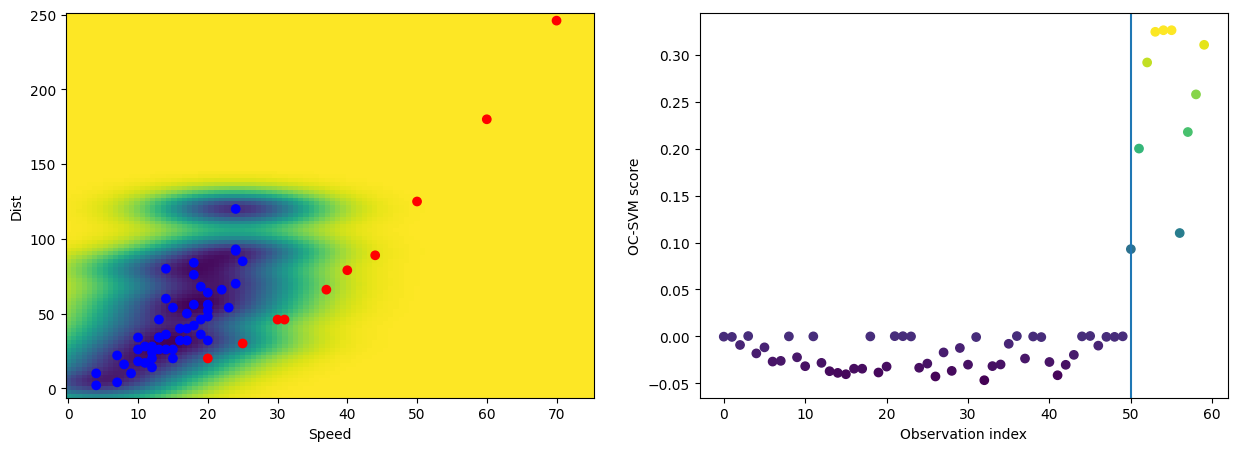

In [10]:
# Create and fit the instance of the class
alg_ocsvm = svm.OneClassSVM(nu = outliers_fraction, kernel = "rbf", gamma = 0.0075)
alg_ocsvm.fit(X[:50,:])
# Calculate the anomaly scores for a map
score0_ocsvm = -alg_ocsvm.decision_function(np.c_[xs.ravel(), ys.ravel()])
zs = score0_ocsvm.reshape(xs.shape)
# Plot the anomaly score as a map
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.pcolormesh(xs, ys, zs, shading='auto')
plt.scatter(X[:,0], X[:,1], 
           c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')
# Plot the anomaly score by color
score1_ocsvm = -alg_ocsvm.decision_function(X)
plt.subplot(122)
plt.scatter(range(0, score1_ocsvm.shape[0]), score1_ocsvm, c = score1_ocsvm)
plt.axvline(50)
plt.xlabel('Observation index')
plt.ylabel('OC-SVM score')

## 4) Isolation forest

Text(0, 0.5, 'IF score')

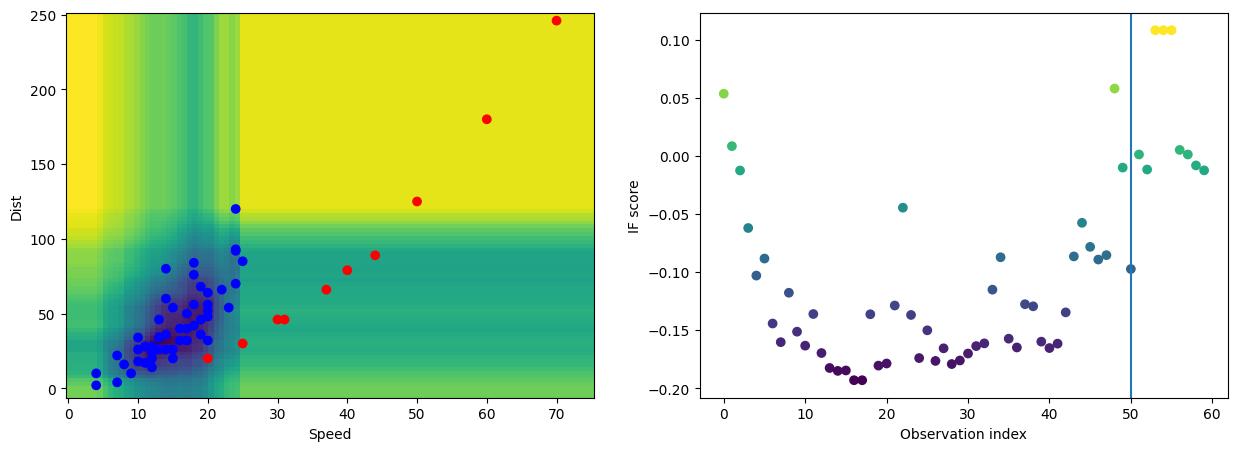

In [11]:
# Create and fit the instance of the class
alg_if =  IsolationForest(contamination = outliers_fraction, random_state = 1)
alg_if.fit(X[:50,:])
# Calculate the anomaly scores for a map
score0_if = -alg_if.decision_function(np.c_[xs.ravel(), ys.ravel()])
zs = score0_if.reshape(xs.shape)
# Plot the anomaly score as a map
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.pcolormesh(xs, ys, zs, shading='auto')
plt.scatter(X[:,0], X[:,1], 
           c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')
# Plot the anomaly score by color
score1_if = -alg_if.decision_function(X)
plt.subplot(122)
plt.scatter(range(0, score1_if.shape[0]), score1_if, c = score1_if)
plt.axvline(50)
plt.xlabel('Observation index')
plt.ylabel('IF score')

## 6) Data depth

In [14]:
# Calculate the anomaly scores for a map
score0_depthPr = -depthPrj(np.c_[xs.ravel(), ys.ravel()], X[:50,:])
zs = score0_depthPr.reshape(xs.shape)
# Plot the anomaly score as a map
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.pcolormesh(xs, ys, zs, shading='auto')
plt.scatter(X[:,0], X[:,1], 
           c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')
# Plot the anomaly score by color
score1_depthPr = -depthPrj(X, X[:50,:])
plt.subplot(122)
plt.scatter(range(0, score1_depthPr.shape[0]), score1_depthPr, c = score1_depthPr)
plt.axvline(50)
plt.xlabel('Observation index')
plt.ylabel('Projection depth score')

KeyboardInterrupt: 

In [25]:
# Calculate the anomaly scores for a map
# score0_depthPr = - depthTuk(np.c_[xs.ravel(), ys.ravel()], X[:50,:])
score0_depthPr = - depth_tukey(np.c_[xs.ravel(), ys.ravel()], X[:50,:])
zs = score0_depthPr.reshape(xs.shape)
# Plot the anomaly score as a map
plt.figure(1, figsize=(15, 5))
plt.subplot(121)
plt.pcolormesh(xs, ys, zs, shading='auto')
plt.scatter(X[:,0], X[:,1],
           c = np.concatenate((np.full(50, "blue"), np.full(10, "red"))))
plt.xlabel('Speed')
plt.ylabel('Dist')
# Plot the anomaly score by color
score1_depthPr = -depthPrj(X, X[:50,:])
plt.subplot(122)
plt.scatter(range(0, score1_depthPr.shape[0]), score1_depthPr, c = score1_depthPr)
plt.axvline(50)
plt.xlabel('Observation index')
plt.ylabel('Projection depth score')

NameError: name 'depth_tukey' is not defined